# Feature Engineering: Techniques for Feature Extraction and Selection

## Introduction

Feature engineering is the process of 
- selecting, 
- modifying, or 
- creating features (variables) from raw data to improve the performance of machine learning models. 

Well-crafted features often lead to better model accuracy and generalization. It involves both feature extraction and feature selection.

## 1. Feature Extraction

This involves transforming raw data into features that can be used for machine learning models. Often, domain knowledge is used to create relevant features.

## 2. Feature Selection

This process involves selecting the most important features from the available features, which can reduce model complexity and prevent overfitting.

--> Overfitting and Underfitting. --> Pending

## 1. Feature Extraction

### 1.1. Handling Date/Time Data
<b>Real-time example:</b> A company wants to predict the number of bike rentals on any given day using a historical dataset containing rental data.

<b>Scenario:</b>

- Dataset contains a column called date_time, which includes the full timestamp of each rental.
- Raw timestamp may not be useful directly, so we extract useful information like the day, month, hour, etc.

In [11]:
import pandas as pd

# Sample data
data = {'date_time': ['2024-08-15 08:00:00', '2024-08-16 14:30:00', '2024-08-17 19:45:00']}
df = pd.DataFrame(data)
df

,date_time
0,2024-08-15 08:00:00
1,2024-08-16 14:30:00
2,2024-08-17 19:45:00


In [1]:
import pandas as pd

#sample Data 
data = {'date_time': ['2024-08-15 08:00:00', '2024-08-16 14:30:00', '2024-08-17 19:45:00']}
df = pd.DataFrame(data)
df

,date_time
0,2024-08-15 08:00:00
1,2024-08-16 14:30:00
2,2024-08-17 19:45:00


In [12]:
# Convert to datetime object
df['date_time'] = pd.to_datetime(df['date_time'])
df

,date_time
0,2024-08-15 08:00:00
1,2024-08-16 14:30:00
2,2024-08-17 19:45:00


In [3]:
# Convert to datetime object 
df['date_time'] = pd.to_datetime(df['date_time'])
df

,date_time
0,2024-08-15 08:00:00
1,2024-08-16 14:30:00
2,2024-08-17 19:45:00


In [14]:
# Feature Extraction: Extracting day, month, hour, and day of the week
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek

# Display the dataframe
# print(df)
df

,date_time,day,month,hour,day_of_week
0,2024-08-15 08:00:00,15,8,8,3
1,2024-08-16 14:30:00,16,8,14,4
2,2024-08-17 19:45:00,17,8,19,5


In [4]:
# Feature Extraction : Extarcting day, month, hour, and day of the week

df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek

# Display the dataframe 
df

,date_time,day,month,hour,day_of_week
0,2024-08-15 08:00:00,15,8,8,3
1,2024-08-16 14:30:00,16,8,14,4
2,2024-08-17 19:45:00,17,8,19,5


<b>Explanation:</b>

- Here, we extract multiple features from a single date_time column such as day, month, hour, and day_of_week.
- These extracted features could help the model better understand patterns related to time, such as peak hours or specific days.

### 1.2. Handling Categorical Variables (One-Hot Encoding)
<b>Real-time example:</b> A company wants to predict customer churn based on various customer attributes, one of which is the subscription_plan (Basic, Standard, Premium).

<b>Scenario:</b>

- Machine learning algorithms cannot work with categorical text data directly, so we need to convert categorical variables into numerical values.
- One-Hot Encoding is commonly used for categorical variables.

In [16]:
# Sample data
data = {'subscription_plan': ['Basic', 'Premium', 'Standard', 'Premium', 'Basic']}
df = pd.DataFrame(data)
df

,subscription_plan
0,Basic
1,Premium
2,Standard
3,Premium
4,Basic


In [6]:
# Sample data 
data = {'subscription_plan': ['Basic', 'Premium', 'Standard', 'Premium', 'Basic']}
df = pd.DataFrame(data)
df

,subscription_plan
0,Basic
1,Premium
2,Standard
3,Premium
4,Basic


In [17]:
# Apply one-hot encoding to 'subscription_plan'
df_encoded = pd.get_dummies(df['subscription_plan'], prefix='plan')

# Display the encoded dataframe
# print(df_encoded)
df_encoded

,plan_Basic,plan_Premium,plan_Standard
0,True,False,False
1,False,True,False
2,False,False,True
3,False,True,False
4,True,False,False


In [7]:
# Apply one-hot-encoding to 'subscription_plan'
df_encoded = pd.get_dummies(df['subscription_plan'], prefix = 'plan')

# Display the encoded dataframe
# print(df_encoded)

df_encoded

,plan_Basic,plan_Premium,plan_Standard
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0
4,1,0,0


<b>Explanation:</b>

- One-Hot Encoding transforms categorical variables into multiple binary (0 or 1) columns.
- For subscription_plan, three new columns are created: plan_Basic, plan_Standard, and plan_Premium.

### 1.3. Text Feature Extraction (TF-IDF)
<b>Real-time example:</b> A company is analyzing customer reviews to identify key themes. The dataset contains a column review_text.

<b>Scenario:</b>

- Text data cannot be used directly in machine learning models.
- We can extract numerical features from text using techniques like TF-IDF (Term Frequency-Inverse Document Frequency).

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample data
reviews = ["Great product and fast delivery!", "Terrible customer service.", "Good value for the price."]

reviews

['Great product and fast delivery!',
 'Terrible customer service.',
 'Good value for the price.']

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

reviews = ['Great product and fast delivery!', 'Not like the picture', 'Good value for the price']
reviews

['Great product and fast delivery!',
 'Not like the picture',
 'Good value for the price']

In [22]:
# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the text data into TF-IDF features
tfidf_matrix = tfidf.fit_transform(reviews)

# Convert to array and display the first 5 features
tfidf_matrix.toarray()

array([[0.4472136 , 0.        , 0.4472136 , 0.4472136 , 0.        ,
        0.        , 0.4472136 , 0.        , 0.4472136 , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.57735027, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.57735027,
        0.57735027, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.4472136 ,
        0.4472136 , 0.        , 0.4472136 , 0.        , 0.        ,
        0.        , 0.4472136 , 0.4472136 ]])

In [10]:
tfidf = TfidfVectorizer()

tfidf_matrix = tfidf.fit_transform(reviews)

tfidf_matrix.toarray()

array([[0.4472136 , 0.4472136 , 0.4472136 , 0.        , 0.        ,
        0.4472136 , 0.        , 0.        , 0.        , 0.        ,
        0.4472136 , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.52863461, 0.52863461, 0.52863461, 0.        ,
        0.        , 0.40204024, 0.        ],
       [0.        , 0.        , 0.        , 0.46735098, 0.46735098,
        0.        , 0.        , 0.        , 0.        , 0.46735098,
        0.        , 0.35543247, 0.46735098]])

<b>Explanation:</b>

- TF-IDF converts text into numerical features based on the frequency of words and their importance across the document.
- It helps in identifying significant terms that are unique to a particular review.


## 2. Feature Selection

### 2.1. Removing Redundant Features (Correlation)
<b>Real-time example:</b> A healthcare company is predicting patient health scores based on various biometric features, such as height, weight, BMI.

<b>Scenario:</b>

- Some features might be highly correlated, which can lead to redundancy and overfitting in the model.
- If two features are highly correlated, we can remove one to simplify the model.

In [24]:
import seaborn as sns
import numpy as np

# Sample data
data = {'height': [170, 165, 180, 175, 160],
        'weight': [70, 65, 80, 75, 60],
        'BMI': [24.2, 23.9, 24.7, 24.5, 23.4]}

df = pd.DataFrame(data)

df

,height,weight,BMI
0,170,70,24.2
1,165,65,23.9
2,180,80,24.7
3,175,75,24.5
4,160,60,23.4


In [12]:
import seaborn as sns
import numpy as np

# sample data 
data = {
    'height': [170, 165, 180, 175, 160],
    'weight': [70, 65, 80, 75, 60],
    'BMI' : [24.2, 23.9, 24.7, 24.5, 23.4]
}

df = pd.DataFrame(data)
df

,height,weight,BMI
0,170,70,24.2
1,165,65,23.9
2,180,80,24.7
3,175,75,24.5
4,160,60,23.4


In [25]:
# Calculate the correlation matrix
corr_matrix = df.corr()

corr_matrix

,height,weight,BMI
height,1.000000,1.000000,0.986602
weight,1.000000,1.000000,0.986602
BMI,0.986602,0.986602,1.000000


In [13]:
corr_matrix = df.corr()

corr_matrix

,height,weight,BMI
height,1.000000,1.000000,0.986602
weight,1.000000,1.000000,0.986602
BMI,0.986602,0.986602,1.000000


<Axes: >

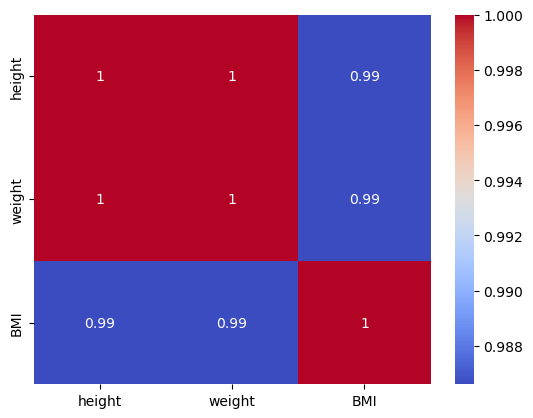

In [26]:
# Plot the correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<AxesSubplot:>

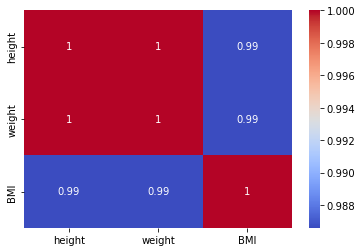

In [14]:
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')

<b>Explanation:</b>

- The correlation matrix shows the relationships between features. If two features have a high correlation (close to 1 or -1), one of them may be redundant.
- For instance, weight and BMI might be highly correlated since BMI is calculated based on weight and height. We could consider removing one of these features.

### 2.2. Recursive Feature Elimination (RFE)
<b>Real-time example:</b> A real estate company wants to predict house prices based on multiple features like area, bedrooms, bathrooms, location, etc.

<b>Scenario:</b>

- Recursive Feature Elimination (RFE) selects features by recursively considering smaller sets of features.
- RFE helps select a subset of features that are most predictive of the target variable.


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Sample data
X = df[['height', 'weight', 'BMI']]  # Feature matrix
y = [1, 0, 1, 1, 0]  # Target (binary labels for illustration)

# Create a Linear Regression model
model = LinearRegression()

# Apply Recursive Feature Elimination (RFE)
rfe = RFE(model, n_features_to_select=2)
fit = rfe.fit(X, y)

# Display the ranking of features
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)


Selected Features:  [ True False  True]
Feature Ranking:  [1 2 1]


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

x = df[['height', 'weight', 'BMI']]
y = [1, 0, 1, 1, 0]

model = LinearRegression()

rfe = RFE(model, n_features_to_select = 2)
fit = rfe.fit(x,y)

print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)

Selected Features:  [ True False  True]
Feature Ranking:  [1 2 1]


<b>Explanation:</b>

- RFE ranks the features based on their importance to the model.
- In this case, RFE selects the top 2 features out of the 3 available (height, weight, BMI).

## Overfitting

<b>In machine learning, the goal is to train a model that can generalize well to unseen data. Overfitting and underfitting are two common problems encountered during this process.</b>


<font size = 3>
1. Overfitting<br><br>
- Definition: Overfitting occurs when a model learns not only the underlying patterns in the training data but also the noise or random fluctuations. The model becomes too complex and performs extremely well on the training data but poorly on unseen data.<br><br>
- Reason: Overfitting typically happens when the model is too complex, meaning it has too many parameters relative to the amount of data.<br><br>
- Symptoms: Low training error, but high validation/test error.

### 1. Predicting Exam Scores Based on Study Hours
Suppose you're building a ML model to predict students' exam scores based on the number of hours they study. Let's explore underfitting and overfitting in this context.

<b>Underfitting Example:</b>

You use a linear model to predict the exam scores, assuming that scores will always increase in a straight line with study hours.

Reality: After a certain point (say, 8 hours of study), additional hours may not lead to significant improvement in scores, or students might even get tired and perform worse.

Underfitting happens because your linear model is too simple and doesn't capture this nuanced relationship.

Real-World Consequences: The model will under-predict for students who study a lot, and over-predict for students who study too little. It performs poorly on both training and unseen test data.

<b>Overfitting Example:</b>

You use a complex model that tries to account for every variation in the data. For instance, a student who studied 9 hours and got a 70 on the test may be an outlier due to external factors (e.g., bad health). But the model fits this specific case too closely, treating it as a pattern.

Reality: The model fits each student’s score perfectly in the training data, but fails to generalize when predicting scores for new students.

Overfitting happens because the model is too complex, fitting random noise or irrelevant details in the data.

Real-World Consequences: On unseen data, this model will give poor predictions because it’s learned too many irrelevant details from the training set.